# OCEAN sample analysis with PAMA-seq and metagenomics
### Objective
1. Compare the taxonomic analysis between PAMA-seq and metagenomics uisng different profillers.
2. PAMA-seq target the rRNA while metagenomic analyze all DNA, so the reads that are used in taxa analysis in PAMA-seq should be higher.
3. Shannon index
4. Phylum level abundance (plot the tree and the abundance heatmap)
5. vinn diagram plot of the phylum identified using different methods.
6. correlation between different methods.


## Ocean metagenomics taxonomic analysis

metagenomics of the sea water sample was processed using Metaphlan (by Kai), Kraken2 (kbase, kraken2 and kraken_mini), Gottcha2 (kbase, default database), and Kaiju (nr+Euks, and no Euks)


This notebook will combine the taxa at Phylum level. 

read count: ocean1 7775903 and ocean2 9267100
total: 17043003

In [2]:
from Bio import Entrez
from Bio import Phylo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.colors import LogNorm
import time
from ete3 import Tree, TreeStyle, NodeStyle,NCBITaxa
import numpy as np
from io import StringIO

In [3]:
#wk_dir = '/home/xiangpeng/projects/16S_18S/ocean/ocean_meta/combined/'
wk_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/data/ocean/'
out_dir = '/home/xiangpeng/projects/16S_18S/code_for_github/output/ocean/'

### Metaphlan

In [5]:
# Metaphlan
mtpl = pd.read_csv(wk_dir+'ocean_meta_metaphlan.csv', index_col =0)
mtpl.head()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Ocean1,Ocean2
1,Bacteria,Bacteroidetes,Flavobacteriia,Flavobacteriia_unclassified,Flavobacteriia_unclassified,Flavobacteriia_unclassified,Flavobacteria_bacterium_MS024_3C,1.28153,1.23433
2,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonas,Pseudoalteromonas_sp_10_33,1.24487,1.26136
3,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Lentibacter,Lentibacter_algarum,0.92557,0.91957
4,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Planktomarina,Planktomarina_temperata,0.82839,0.82603
5,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Pseudoalteromonadaceae,Pseudoalteromonas,Pseudoalteromonas_marina,0.70548,0.77831


In [8]:
# combine the two subsamples by their read counts. read count: ocean1 7775903 and ocean2 9267100 total: 17043003
mtpl['ocean_metaphlan']=(mtpl['Ocean1']*7775903+mtpl['Ocean2']*9267100)/1704300300

In [9]:
mtpl_by_phyla = mtpl.groupby(by='Phylum').sum()[['ocean_metaphlan']]

In [10]:
mtpl_by_phyla.to_csv(wk_dir+'ocean_metaphlan_by_phylum.csv')

In [15]:
mtpl_by_phyla

,ocean_metaphlan
Phylum,
Actinobacteria,2.968270e-03
Bacteroidetes,4.187122e-02
Cyanobacteria,1.929070e-04
Firmicutes,1.853347e-03
Proteobacteria,9.530832e-02
Rhodothermaeota,3.262488e-07
Tenericutes,7.681438e-05
Thermodesulfobacteria,8.077137e-04


### Kraken 

In [23]:
# kraken
k2 = pd.read_csv(wk_dir + 'Ocean_kraken2_datatable_kai.csv',index_col=0)
#k2mini = pd.read_csv(krk_dir + 'Ocean_kraken2_datatable_minikraken2.csv', names = ['percentage', 'read_covered', 'read_assigned', 'rank', 'NCBI_id', 'name'])

In [24]:
#Normalize the reads by the total reads
k2['ocean_kraken']=(k2['Ocean1']+k2['Ocean2'])/17043003

In [25]:
# group the results by phylum
k2_by_phylum = k2.groupby(by='Phylum').sum()[['ocean_kraken']]

In [26]:
k2_by_phylum.to_csv(wk_dir+'ocean_kraken_by_phylum.csv')

In [27]:
k2_by_phylum

,ocean_kraken
Phylum,
4572-55,1.525553e-06
AABM5-125-24,7.041013e-07
AB1-6,8.214515e-07
ARS69,1.760253e-07
Acidobacteriota,3.320424e-04
...,...
WOR-3,3.755207e-06
WOR-3_A,2.464354e-06
WOR-3_B,4.987384e-06


### Kaiju (with No euk database)

In [29]:
kj_noEuk = pd.read_csv(wk_dir+'kaiju_no_euk/Ocean-1-phylum-longtail.kaijuReport', sep= '\t')
kj_noEuk['kj_no_Euk_relative_abd'] = kj_noEuk['reads'].div(kj_noEuk['reads'].sum())
kj_noEuk = kj_noEuk.sort_values(by='kj_no_Euk_relative_abd', ascending=False)
kj_noEuk.rename(columns = {'taxon_name':'Phylum', 'kj_no_Euk_relative_abd': 'ocean_kaiju'}, inplace = True)


In [32]:
# Group by phylum
kj_noEuk_by_phylum = kj_noEuk.set_index('Phylum')[['ocean_kaiju']]
kj_noEuk_by_phylum.to_csv(wk_dir+'ocean_kaiju_noEuk_by_phylum.csv')


In [33]:
kj_noEuk_by_phylum


,ocean_kaiju
Phylum,
unclassified,6.320049e-01
Proteobacteria,2.422038e-01
Bacteroidetes,8.467758e-02
cannot be assigned to a (non-viral) phylum,8.701520e-03
Actinobacteria,7.750983e-03
...,...
Coprothermobacterota,5.867512e-07
candidate division LCP-89,5.867512e-07
Candidatus Cryosericota,5.867512e-07


### Kaiju (with euk database)

In [34]:
kj_Euk = pd.read_csv(wk_dir + 'kaiju_euk/Ocean-1-phylum-longtail.kaijuReport', sep= '\t')
kj_Euk['kj_Euk_relative_abd']=kj_Euk['reads'].div(kj_Euk['reads'].sum())

In [35]:
kj_Euk.rename(columns = {'taxon_name':'Phylum', 'kj_Euk_relative_abd': 'ocean_kaiju_euk'}, inplace = True)
kj_Euk['ocean_kaiju_euk'].sum()

np.float64(0.9999999999999999)

In [37]:
kj_Euk_by_phylum = kj_Euk.set_index('Phylum')[['ocean_kaiju_euk']]
kj_Euk_by_phylum.to_csv(wk_dir+'ocean_kaiju_Euk_by_phylum.csv')
kj_Euk_by_phylum

,ocean_kaiju_euk
Phylum,
Proteobacteria,2.404037e-01
Bacteroidetes,8.406032e-02
Bacillariophyta,1.677756e-02
Actinobacteria,7.472276e-03
Planctomycetes,5.332981e-03
...,...
candidate division LCP-89,5.867512e-07
Candidatus Muirbacteria,5.867512e-07
Viruses,1.056739e-03


### Gottcha2

In [38]:
gt = pd.read_csv(wk_dir+'Ocean_gottcha2.summary.tsv', sep = '\t')
gt_p = gt[gt['LEVEL']=='phylum']
gt_p.rename(columns = {'NAME':'Phylum'}, inplace = True)
gt_p['Phylum'] = gt_p['Phylum'].apply(lambda x: x.split(' - ')[0])

/tmp/ipykernel_58300/3355550798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_p.rename(columns = {'NAME':'Phylum'}, inplace = True)
/tmp/ipykernel_58300/3355550798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_p['Phylum'] = gt_p['Phylum'].apply(lambda x: x.split(' - ')[0])


In [39]:
gt_p['ocean_gottcha']=gt_p['READ_COUNT'].div(17043003)
gt_p_by_phylum = gt_p[['ocean_gottcha']]
gt_by_phylum = gt_p.set_index('Phylum')[['ocean_gottcha']]
gt_by_phylum

/tmp/ipykernel_58300/346981996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_p['ocean_gottcha']=gt_p['READ_COUNT'].div(17043003)


,ocean_gottcha
Phylum,
Proteobacteria,3.514656e-02
Bacteroidetes,4.003813e-03
Caudovirales,2.505427e-05
Dinodnavirus,1.760253e-07
Thaumarchaeota,4.887636e-05
Cyanobacteria,9.687260e-05
Phycodnaviridae,4.107257e-07
Mimiviridae,2.347004e-07


In [40]:
gt_by_phylum.to_csv(wk_dir+'ocean_gottcha2_by_phylum.csv')

### CZID

In [41]:
czid = pd.read_csv(wk_dir+'ocean_czid.csv', index_col =0)
czid = czid[czid['tax_level']==1]
czid = czid[czid['genus_tax_id']>0]
czid

,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,nt_rpm,...,nr_contig_r,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen
tax_id,,,,,,,,,,,,,,,,,,,,,
2814576,1,3118923,Actinarchaeum halophilum,NaN,archaea,False,NaN,NaN,NaN,0.261484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2978973,1,3118803,Fontisubflavum oceani,NaN,bacteria,False,NaN,NaN,NaN,2.440514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3031815,1,3117352,Marinimicrococcus flavescens,NaN,bacteria,False,NaN,NaN,NaN,NaN,...,NaN,90.2,46.0,10^-21.3488,NaN,NaN,NaN,NaN,NaN,0
3113649,1,3113648,Medakamo hakoo,NaN,eukaryota,False,NaN,NaN,NaN,0.653709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1507870,1,3112694,Cryoendolithus antarcticus,NaN,eukaryota,False,NaN,NaN,NaN,NaN,...,NaN,69.4,49.0,10^-12.1432,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945512,1,10,Cellvibrio sp. PSBB023,NaN,bacteria,False,NaN,NaN,NaN,0.043581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
472168,1,10,Cellvibrio sp. J115,NaN,bacteria,False,NaN,NaN,NaN,0.261484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
472167,1,10,Cellvibrio sp. J113,NaN,bacteria,False,NaN,NaN,NaN,0.435806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [43]:
taxonomic_df=pd.read_csv(wk_dir +'ocean_subsample_taxa_names_v2.csv', index_col = 0)
taxonomic_df.head()

,taxa_id,domain,kingdom,phylum,class,order,family,genus,species
0,3044860,Viruses,Bamfordvirae,Nucleocytoviricota,Megaviricetes,Imitervirales,Mimiviridae,NaN,Yasminevirus
1,3040949,Bacteria,NaN,Pseudomonadota,Gammaproteobacteria,Cellvibrionales,Halieaceae,NaN,Candidatus Litorirhabdus
2,3028536,Bacteria,NaN,Planctomycetota,Planctomycetia,Pirellulales,Pirellulaceae,NaN,Neorhodopirellula
3,2993541,Bacteria,NaN,Bacteroidota,Saprospiria,Saprospirales,Lewinellaceae,NaN,Neolewinella
4,2919372,Bacteria,NaN,Pseudomonadota,Gammaproteobacteria,Cellvibrionales,Halieaceae,NaN,Seongchinamella


In [45]:
czid['Phylum']=czid['genus_tax_id'].map(taxonomic_df['phylum'])

In [46]:
czid_by_phylum = czid.groupby(by='Phylum').sum()[['nt_rpm', 'nr_rpm']].div(500000)
czid_by_phylum.to_csv(wk_dir+ 'czid_by_phylym.csv')

In [47]:

czid_by_phylum

,nt_rpm,nr_rpm
Phylum,,
Acidobacteriota,2.091869e-06,0.000000e+00
Actinomycetota,2.164388e-03,2.716964e-02
Annelida,2.266192e-06,4.099192e-04
Apicomplexa,8.716123e-08,8.716123e-08
Arthropoda,6.266892e-05,8.454900e-03
...,...,...
Thermotogota,6.101286e-07,8.716123e-08
Tubulinea,0.000000e+00,8.716123e-08
Uroviricota,2.809119e-03,2.000786e-03


### PAM-seq 

In [48]:
pam_df = pd.read_csv(wk_dir + 'allAmplicon_Full_updated.csv')
pam_subsample = pd.read_csv(wk_dir + 'PAM-seq_subsample_taxa_updated_v2.csv', index_col = 0)

In [49]:
ocean_sample_ls =['ocean_16_18_1_CKDL240015361.1A_22KKKMLT3','ocean_16_18_2_CKDL240015361.1A_22KKKMLT3','ocean_16_18_3_CKDL240015361.1A_22KKKMLT3','ocean_16_18_4_CKDL240015361.1A_22KKKMLT3']

In [50]:
pam_df['ocean'] = pam_df[ocean_sample_ls].sum(axis=1)

In [51]:
pam_df.head()

,Unnamed: 0.1,Unnamed: 0,TotalAbundance,ASV,Kingdom,Phylum,Class,Order,Family,Genus,...,Sequence,gut_16_18_1_CKDL240015361.1A_22KKKMLT3,gut_16_18_2_CKDL240015361.1A_22KKKMLT3,gut_16_18_3_CKDL240015361.1A_22KKKMLT3,gut_16_18_4_CKDL240015361.1A_22KKKMLT3,ocean_16_18_1_CKDL240015361.1A_22KKKMLT3,ocean_16_18_2_CKDL240015361.1A_22KKKMLT3,ocean_16_18_3_CKDL240015361.1A_22KKKMLT3,ocean_16_18_4_CKDL240015361.1A_22KKKMLT3,ocean
0,0,23523,5,87361e2d775b0b8cc388905744e06e32,Bacteria,Pseudomonadota,Betaproteobacteria,Burkholderiales,Burkholderiaceae,Burkholderia-Paraburkholderia,...,ATGGAATCGACGAGAGCAGGGGGGGGCTTTAACCATTCCGCACAGG...,0,0,0,0,0,0,5,0,5
1,1,180,12567,b364bc90e8aa9c090fffadc28a4481f9,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,Thermoplasmatales uncultured,uncultured,...,TCAACGCGGGCTGATGACCCGCGCTTACTAGGAATTCCACCTTCAA...,0,0,0,2,934,1469,2572,7590,12565
2,2,216,8897,de4ceadea0f7f7cd2ddc1a908a2af59d,Archaea,Aenigmarchaeota,Aenigmarchaeota Unknown Order,Unknown Family,Candidatus,NaN,...,TCAATGCAGATTGATGATCTGCGTTTACTAGGAATTCCTCGTTCAA...,0,0,0,0,535,928,1825,5609,8897
3,3,227,8309,5399cac311244019606508412831e436,Archaea,Lokiarchaeota,uncultured archaeon,NaN,NaN,NaN,...,TCAGCGCGAGTTGATGACTCACGCTTACAAGGCATTCCTCGTTCAA...,0,0,0,0,447,883,5404,1575,8309
4,4,236,7893,74409959044e0b13e5ff51be550dcb0a,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,...,GCAAGGGAAGGTTTTGAGGAGCAAGGTCCGCTGGTCGGCACGGGTT...,0,0,0,0,0,0,7893,0,7893


In [52]:
pam_df_p = pam_df[['Phylum','ocean']].groupby(by='Phylum').sum()
pam_df_p['pam_rel_abd']=pam_df_p['ocean'].div(pam_df_p['ocean'].sum())
pam_df_p =pam_df_p.sort_values(by='ocean',ascending=False)

In [53]:
pam_df_p.to_csv(wk_dir + 'pam-seq_ocean_by_phylum_v2.csv')

In [54]:
pam_df_p

,ocean,pam_rel_abd
Phylum,,
Streptophyta,4037961,2.274119e-01
Pseudomonadota,2682620,1.510811e-01
Foraminifera,1812668,1.020867e-01
Cyanobacteria,1169153,6.584494e-02
Arthropoda,845836,4.763621e-02
...,...,...
Candidatus Adlerbacteria,2,1.126370e-07
Zoopagomycotina,2,1.126370e-07
Candidatus Amesbacteria,2,1.126370e-07


In [55]:
taxa_lev = 'Genus'

pam_df_g = pam_df[[taxa_lev,'ocean']].groupby(by=taxa_lev).sum()
pam_df_g['pam_rel_abd']=pam_df_g['ocean'].div(pam_df_g['ocean'].sum())
pam_df_g =pam_df_g.sort_values(by='ocean',ascending=False)
pam_df_g.to_csv(wk_dir + 'pam-seq_ocean_by_genus_v2.csv')

## Combine data from all analysis methods


In [56]:
pam_meta_cmd = pd.DataFrame() ## pam-seq and metagenomic data combined

df_list = [mtpl_by_phyla, 
           k2_by_phylum,
           kj_noEuk_by_phylum,
           kj_Euk_by_phylum,
           gt_by_phylum,
           czid_by_phylum,
           pam_df_p[['pam_rel_abd']],
          ]
for d in df_list:
    pam_meta_cmd = pd.concat([pam_meta_cmd,d], axis=1)
pam_meta_cmd.to_csv(wk_dir + 'Pam-seq_Meta_all_combined.csv')

In [59]:

pam_meta_cmd_for_bar_plot=pam_meta_cmd.copy()
pam_meta_cmd_for_bar_plot['sum'] = pam_meta_cmd_for_bar_plot.sum(axis=1)
pam_meta_cmd_for_bar_plot.sort_values(by='sum', ascending=False)
# filter the data
pam_meta_cmd_for_bar_plot_subset = pam_meta_cmd_for_bar_plot[pam_meta_cmd_for_bar_plot['sum']>=0.000000001]
pam_meta_cmd_for_bar_plot_subset = pam_meta_cmd_for_bar_plot_subset.drop(index =['unclassified','cannot be assigned to a (non-viral) phylum'])

pam_meta_cmd_for_bar_plot_subset.shape

(493, 9)

/tmp/ipykernel_58300/483441619.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 500x800 with 0 Axes>

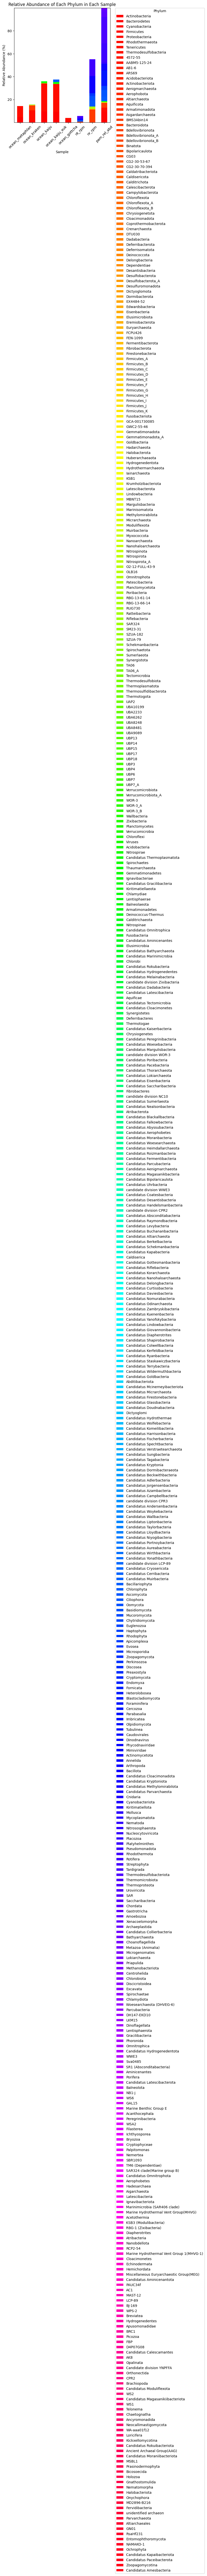

In [71]:
# plot the read percentage from all methods

df = pam_meta_cmd_for_bar_plot_subset

# Normalize the data to get percentages (divide by the sum of each column)
df_percentage = pam_meta_cmd_for_bar_plot_subset[pam_meta_cmd.columns]*100

# Plotting the stacked barplot
plt.figure(figsize=(5, 8))

# Create a color palette (one color for each phylum)
colors = plt.cm.hsv(np.linspace(0, 1, len(df.index)))

# Plot the stacked bar chart
df_percentage.T.plot(kind='bar', stacked=True, color=colors, figsize=(5, 6))

# Customize the plot
plt.title('Relative Abundance of Each Phylum in Each Sample')
plt.ylabel('Relative Abundance (%)')
plt.xlabel('Sample')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Phylum', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig(out_dir+'relative_abundance_plotof_all_methods.pdf', bbox_inches='tight') 
# Show the plot
plt.show()


In [68]:
hue_df = pd.read_csv(wk_dir + 'full_taxonomy_info_combined_ocean_all_method_for_scatterplot_hue.csv')
phylum_kingdom_dict = dict(zip(hue_df['Taxon Name'], hue_df['superkingdom']))
hue_df.head()

,Taxon Name,NCBI ID,no rank,superkingdom,phylum,kingdom,clade,class,Error,subkingdom,genus,family,order,superphylum,subphylum
0,Actinobacteria,201174.0,cellular organisms,Bacteria,Actinomycetota,Bacillati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bacteroidetes,976.0,cellular organisms,Bacteria,Bacteroidota,Pseudomonadati,FCB group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyanobacteria,1117.0,cellular organisms,Bacteria,Cyanobacteriota,Bacillati,Cyanobacteriota/Melainabacteria group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Firmicutes,1783272.0,cellular organisms,Bacteria,NaN,Bacillati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Proteobacteria,1224.0,cellular organisms,Bacteria,Pseudomonadota,Pseudomonadati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
pam_meta_cmd_for_bar_plot_subset['kingdom']=pam_meta_cmd_for_bar_plot_subset.index.map(phylum_kingdom_dict)

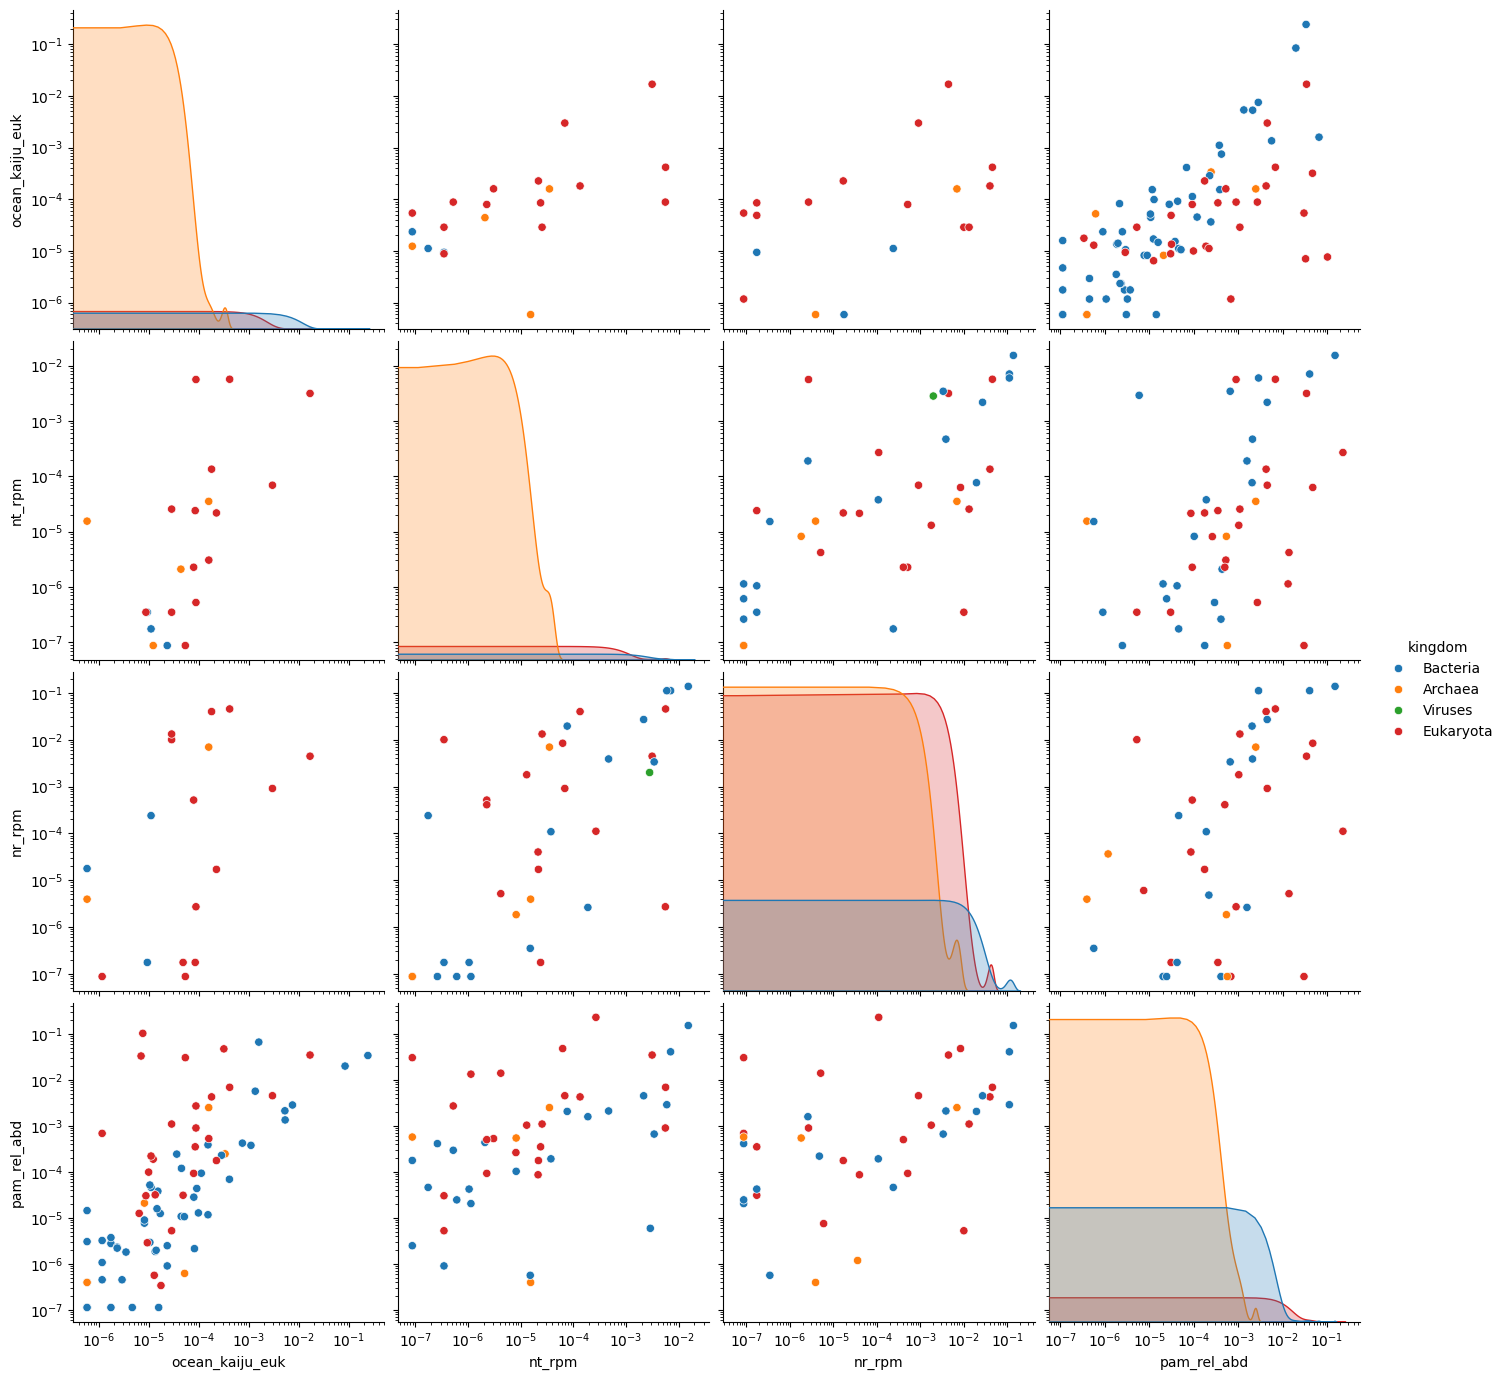

In [72]:
data=pam_meta_cmd_for_bar_plot_subset[['ocean_kaiju_euk','nt_rpm','nr_rpm','pam_rel_abd', 'kingdom']]
# Create the pairplot
pairplot = sns.pairplot(data, 
                        hue = 'kingdom',
                        height=3.5,
                       )


# Apply logarithmic scale to the axes
for ax in pairplot.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
plt.savefig(out_dir + "meta_vs_pam_pairplot.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()

In [15]:
data.drop(columns=['kingdom']).corr()

,ocean_kaiju_euk,nt_rpm,nr_rpm,pam_rel_abd
ocean_kaiju_euk,1.000000,0.413534,0.064054,0.245368
nt_rpm,0.413534,1.000000,0.468945,0.190921
nr_rpm,0.064054,0.468945,1.000000,0.231617
pam_rel_abd,0.245368,0.190921,0.231617,1.000000


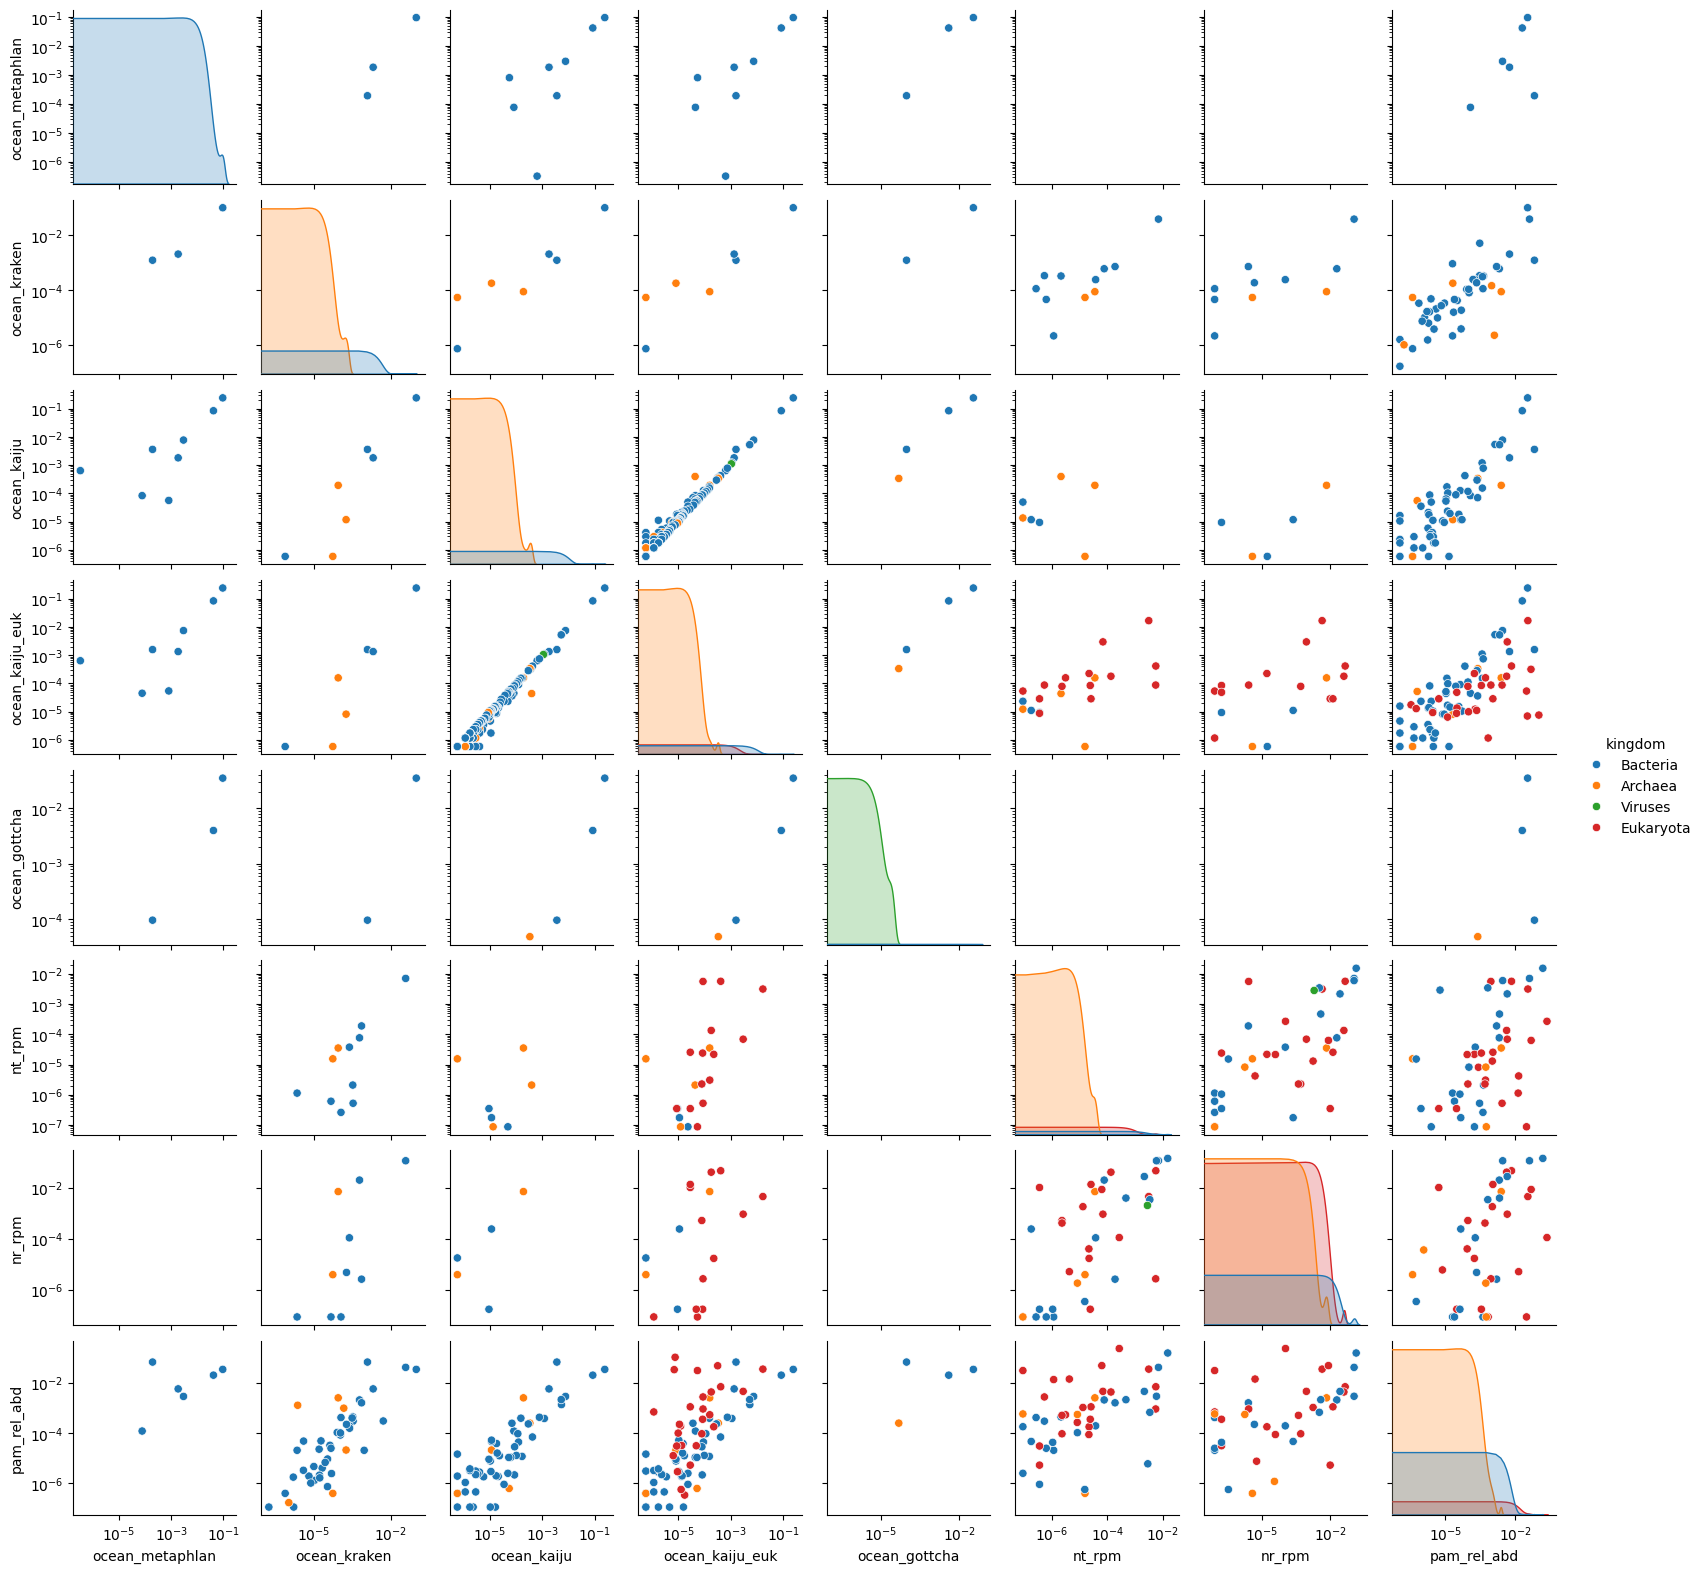

In [73]:

# Create the pairplot
data = pam_meta_cmd_for_bar_plot_subset.drop(columns=['sum'])
pairplot = sns.pairplot(data, 
                        hue = 'kingdom',
                        height=2,
                       )



# Apply logarithmic scale to the axes
for ax in pairplot.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
plt.savefig(out_dir + "meta_vs_pam_pairplot_all.pdf", format="pdf", bbox_inches="tight")
# Show the plot
plt.show()

In [26]:
data.drop(columns=['kingdom']).fillna(0).corr()

,ocean_metaphlan,ocean_kraken,ocean_kaiju,ocean_kaiju_euk,ocean_gottcha,nt_rpm,nr_rpm,pam_rel_abd
ocean_metaphlan,1.000000,0.851892,0.996348,0.994181,0.954541,-0.008979,-0.008579,0.115026
ocean_kraken,0.851892,1.000000,0.877981,0.875957,0.925188,0.105703,0.102234,0.139181
ocean_kaiju,0.996348,0.877981,1.000000,0.997731,0.974271,-0.009144,-0.008737,0.115937
ocean_kaiju_euk,0.994181,0.875957,0.997731,1.000000,0.972221,0.000739,-0.003534,0.121196
ocean_gottcha,0.954541,0.925188,0.974271,0.972221,1.000000,-0.007261,-0.006938,0.106481
nt_rpm,-0.008979,0.105703,-0.009144,0.000739,-0.007261,1.000000,0.562365,0.271231
nr_rpm,-0.008579,0.102234,-0.008737,-0.003534,-0.006938,0.562365,1.000000,0.299248
pam_rel_abd,0.115026,0.139181,0.115937,0.121196,0.106481,0.271231,0.299248,1.000000


In [74]:
pam_meta_cmd_for_bar_plot_subset.drop(columns=['sum'])
import numpy as np
# Shannon index calculation
def calculate_shannon(column):
    # Remove NaN values
    col = column.dropna()
    # Normalize to relative abundances
    col = col / col.sum()
    # Calculate Shannon index
    return -np.sum(col * np.log(col))

# Apply to each column
shannon_indices = pam_meta_cmd_for_bar_plot_subset.drop(columns=['sum', 'kingdom']).apply(calculate_shannon, axis=0)

# Output the Shannon index for each column

/home/xiangpeng/miniconda3/envs/myenv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


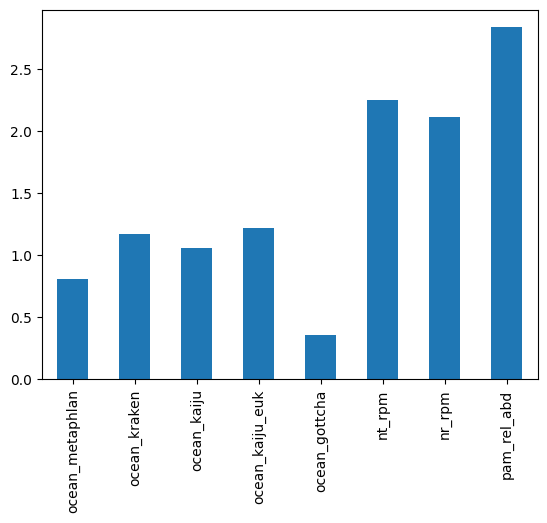

In [75]:
shannon_indices.plot.bar()
plt.savefig(out_dir + "meta_vs_pam_shannon_index_all.pdf", format="pdf", bbox_inches="tight")

In [15]:
shannon_indices

ocean_metaphlan    0.809139
ocean_kraken       1.174844
ocean_kaiju        1.055840
ocean_kaiju_euk    1.222476
ocean_gottcha      0.360999
nt_rpm             2.436991
nr_rpm             2.293568
pam_rel_abd        2.840411
dtype: float64

# venn diagram

In [76]:

ven_col = ['ocean_kaiju_euk', 'nt_rpm','nr_rpm','pam_rel_abd']
venn_df = pam_meta_cmd_for_bar_plot_subset[ven_col].fillna(0).astype(bool)
kaiju_set = set(venn_df[venn_df['ocean_kaiju_euk']==True].index)
nt_set =set(venn_df[venn_df['nt_rpm']==True].index)
nr_set =set(venn_df[venn_df['nr_rpm']==True].index)
pam_set =set(venn_df[venn_df['pam_rel_abd']==True].index)

In [78]:
# Convert sets to lists for saving
kaiju_list = list(kaiju_set)
nt_list = list(nt_set)
nr_list = list(nr_set)
pam_list = list(pam_set)

# Create a DataFrame with the sets
df = pd.DataFrame({
    'Kaiju': pd.Series(kaiju_list),
    'CZID-nt': pd.Series(nt_list),
    'CZID-nr': pd.Series(nr_list),
    'PAM-seq': pd.Series(pam_list)
})

# Save to a CSV file
df.to_csv(wk_dir+'meta_pam_venndiagram.csv', index=False)

## the venn diagram is ploted in R

### Phylogenetic Tree

In [82]:
pam_for_tree = pam_meta_cmd[pam_meta_cmd.sum(axis=1)>0.001]
pam_for_tree = pam_for_tree.drop(index =[ 'unclassified', 'cannot be assigned to a (non-viral) phylum',])
pam_for_tree.shape

(50, 8)

In [83]:

# Initialize the NCBITaxa object with your local taxa.sqlite database
ncbi = NCBITaxa('/home/xiangpeng/.etetoolkit/taxa.sqlite')

# List of taxon names (the ones you want to query)
taxon_names = pam_for_tree.index.tolist()


# Function to get the full taxonomic lineage and domain information
def get_full_taxonomy(taxon_name):
    try:
        # Get the taxid from the taxon name
        taxid = ncbi.get_name_translator([taxon_name])[taxon_name][0]
        
        # Get the full lineage for the taxid
        lineage = ncbi.get_lineage(taxid)
        
        # Get the taxonomic ranks for the lineage
        ranks = ncbi.get_rank(lineage)
        
        # Fetch taxon names for the entire lineage
        lineage_names = ncbi.get_taxid_translator(lineage)
        
        # Store taxonomic information (taxon name and NCBI ID)
        taxonomy_info = {
            'Taxon Name': taxon_name,
            'NCBI ID': taxid
        }
        
        # Add each taxonomic rank to the dictionary
        for rank_id, rank in ranks.items():
            rank_name = ranks.get(rank_id, 'Unknown')
            if rank_name:
                taxonomy_info[rank_name] = lineage_names.get(rank_id, 'Unknown')
        
        return taxonomy_info
    except Exception as e:
        return {'Taxon Name': taxon_name, 'NCBI ID': None, 'Error': str(e)}

# List to hold the results for each taxon
results = []

# Loop through the taxon names and fetch their taxonomy information
for taxon_name in taxon_names:
    taxonomic_info = get_full_taxonomy(taxon_name)
    results.append(taxonomic_info)

# Convert the results into a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to a CSV file (optional)
df.to_csv(wk_dir + 'full_taxonomy_info_combined_ocean_all_method_for_heatmap_and_tree.csv', index=False)

# Print the DataFrame
df.head()

,Taxon Name,NCBI ID,no rank,superkingdom,phylum,kingdom,clade,Error,class,subkingdom
0,Actinobacteria,201174.0,cellular organisms,Bacteria,Actinomycetota,Bacillati,NaN,NaN,NaN,NaN
1,Bacteroidetes,976.0,cellular organisms,Bacteria,Bacteroidota,Pseudomonadati,FCB group,NaN,NaN,NaN
2,Cyanobacteria,1117.0,cellular organisms,Bacteria,Cyanobacteriota,Bacillati,Cyanobacteriota/Melainabacteria group,NaN,NaN,NaN
3,Firmicutes,1783272.0,cellular organisms,Bacteria,NaN,Bacillati,NaN,NaN,NaN,NaN
4,Proteobacteria,1224.0,cellular organisms,Bacteria,Pseudomonadota,Pseudomonadati,NaN,NaN,NaN,NaN


In [84]:
df.loc[10, 'NCBI ID']=1239
df.loc[10, 'superkingdom']='Bacteria'
df.loc[7, 'NCBI ID']=743724
df.loc[7, 'superkingdom	']='Archaea'

In [85]:
pam_for_tree['ncbi_id']=pam_for_tree.index.map(df.set_index("Taxon Name")['NCBI ID'])

<Figure size 1000x800 with 0 Axes>

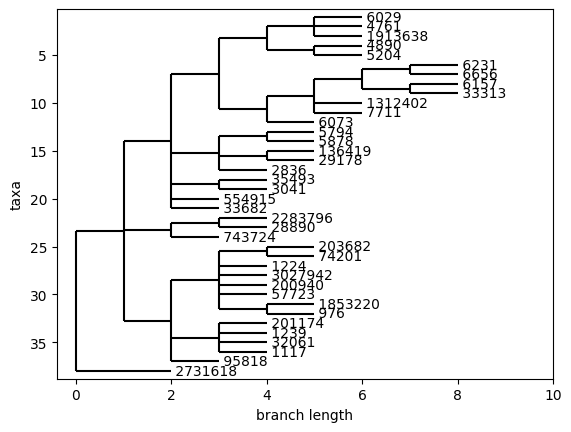

In [94]:
# Initialize NCBITaxa with your local taxa.sqlite database
ncbi = NCBITaxa('/home/xiangpeng/.etetoolkit/taxa.sqlite')

# Initialize NCBITaxa
ncbi = NCBITaxa()

# Example NCBI Tax IDs
taxids = df['NCBI ID'].dropna().tolist()

# Get the NCBI tree topology
tree = ncbi.get_topology(taxids)


# Convert the ETE3 tree to Newick format

newick_tree = tree.write(format=9)  # This gives a Newick string

# Now, use Bio.Phylo to read and plot the tree
tree_bio = Phylo.read(StringIO(newick_tree), "newick")

# Plot the tree
plt.figure(figsize=(10, 8)) 
Phylo.draw(tree_bio,do_show=False)
plt.savefig(out_dir + "tree_plot_for_meta_vs_pam.pdf", format="pdf")


In [95]:
ordered_taxids = [int(leaf.name) for leaf in tree.iter_leaves()]
print(ordered_taxids)

[6029, 4761, 1913638, 4890, 5204, 6231, 6656, 6157, 33313, 1312402, 7711, 6073, 5794, 5878, 136419, 29178, 2836, 35493, 3041, 554915, 33682, 2283796, 28890, 743724, 203682, 74201, 1224, 3027942, 200940, 57723, 1853220, 976, 201174, 1239, 32061, 1117, 95818, 2731618]


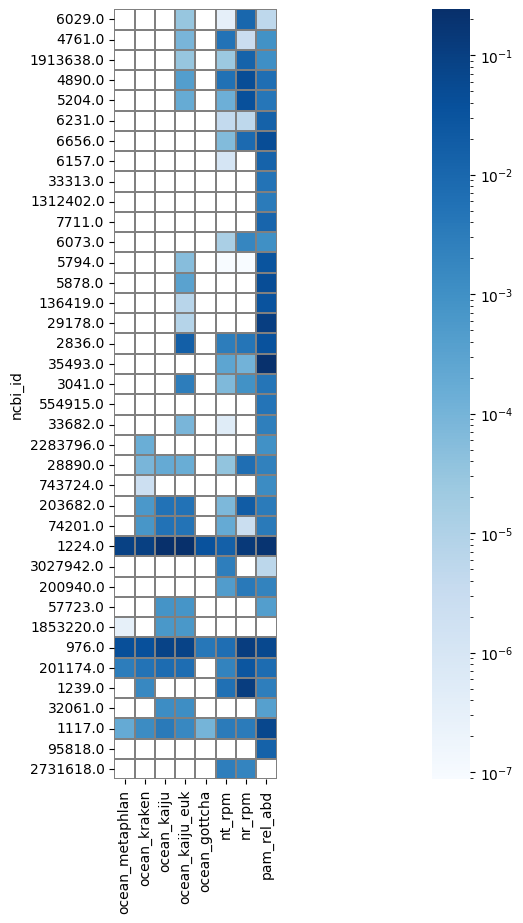

In [96]:
plt.figure(figsize=(40, 10))
sns.heatmap(pam_for_tree.groupby('ncbi_id').sum().loc[ordered_taxids],
            square=True,
            norm=LogNorm(),
            cmap="Blues",
            linewidths = 0.01, 
            linecolor = 'grey'
           )

plt.savefig(out_dir + "taxon_abundance_heatmap_for_meta_vs_pam.pdf", format="pdf")
plt.show()
